In [8]:
# Question 1: Use yfinance to Extract Stock Data
import yfinance as yf

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index and save
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla revenue data
url = 'https://query1.finance.yahoo.com/v7/finance/TSLA?period1=0&period2=9999999999&interval=1d&events=history&includeAdjustedClose=true'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract revenue data
revenue_data = soup.find_all('div', class_='D(tbr)')

tesla_revenue = []
for div in revenue_data:
    if 'Total Revenue' in div.text:
        # Find the next cell with the revenue value
        revenue_value = div.find_next('div').text
        tesla_revenue.append(revenue_value)

# Convert to DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=['Revenue'])

# Display the last five rows
print(tesla_revenue_df.tail())

Empty DataFrame
Columns: [Revenue]
Index: []


In [14]:
# Question 3: Use yfinance to Extract Stock Data
# Extract GameStop stock data
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")

# Reset the index and save
gme_data.reset_index(inplace=True)

# Display the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [30]:
# Question 4: Use Webscraping to Extract GME Revenue Data
# URL for GameStop revenue data
url = 'https://query1.finance.yahoo.com/quote/GME/financials?p=GME'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract revenue data
revenue_data = soup.find_all('td', string='Total Revenue')
gme_revenue = []
if revenue_data:
    for td in revenue_data:
        gme_revenue.append(td.find_next_sibling('td').text)

# Convert to DataFrame
gme_revenue_df = pd.DataFrame(gme_revenue, columns=['Revenue'])

# Display the last five rows
gme_revenue_df.tail()

,Revenue


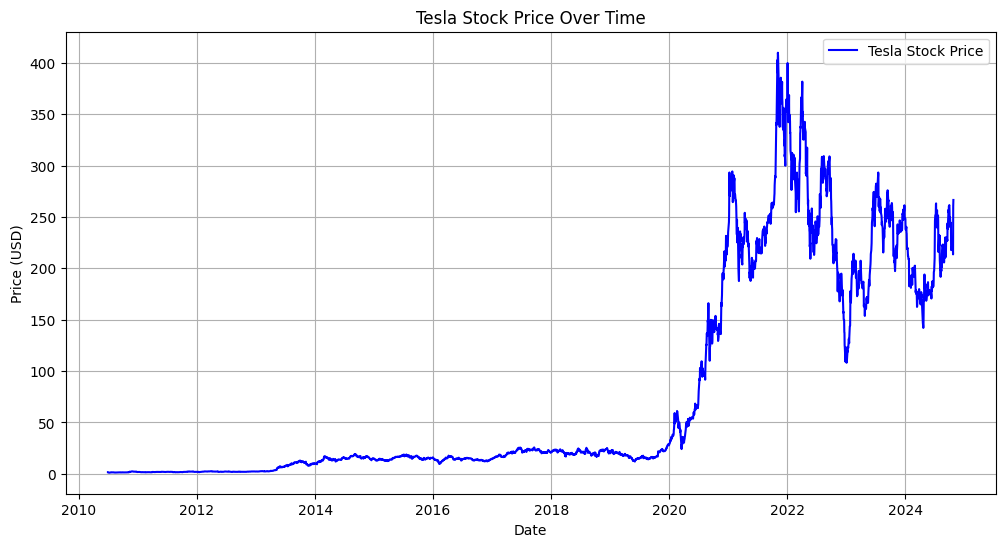

In [17]:
# Question 5: Plot Tesla Stock Graph
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Tesla Stock Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

# Plotting Tesla Stock Graph
make_graph(tesla_data, 'Tesla Stock Price Over Time')

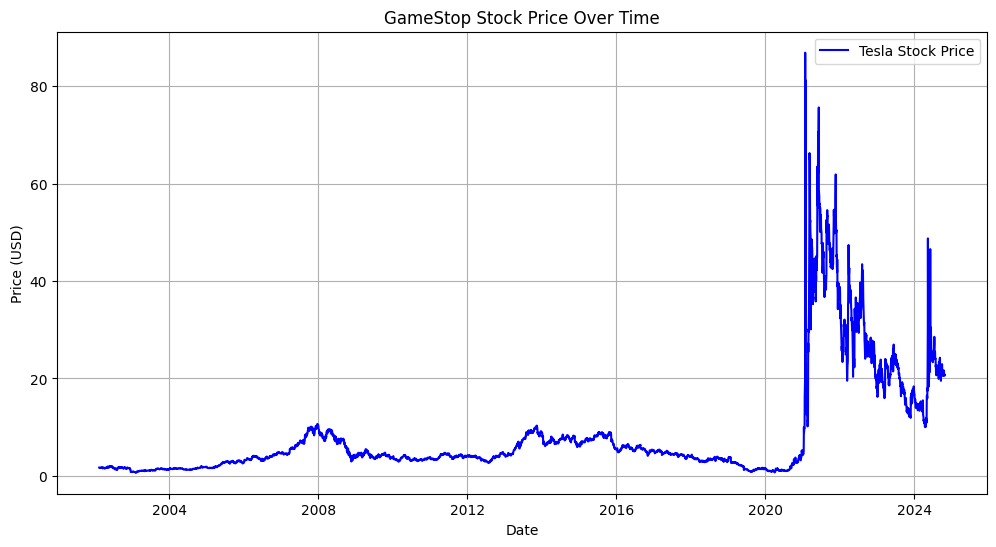

In [18]:
# Question 6: Plot GameStop Stock Graph
# Plotting GameStop Stock Graph
make_graph(gme_data, 'GameStop Stock Price Over Time')